# Set up enviroment

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Start

In [3]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [4]:
dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/Vietcombank.csv'
df = pd.read_csv(dataset_path, index_col="Date")


In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
3/1/2019,40478.95313,41275.25781,40346.23438,41275.25781,41275.25781,1225908
3/4/2019,41275.25781,41806.13281,41275.25781,41673.41406,41673.41406,2030592
3/5/2019,41673.41406,42337.00391,41474.33594,41806.13281,41806.13281,2376092
3/6/2019,41872.48828,42005.20703,41076.18359,41607.05469,41607.05469,2107101
3/7/2019,41607.05469,42337.00391,41540.69531,41872.48828,41872.48828,3091640
3/8/2019,41407.97656,41806.13281,41208.90234,41673.41406,41673.41406,1502992
3/11/2019,41407.97656,41607.05469,41076.18359,41540.69531,41540.69531,2149189
3/12/2019,41806.13281,43000.59375,41607.05469,43000.59375,43000.59375,3397250
3/13/2019,43133.30859,43266.02734,42801.51563,43266.02734,43266.02734,2682908


In [6]:
print(f"Data shape: {df.shape}")

Data shape: (1245, 6)


## Data preprocessing

### Checking duplicates and null values

In [7]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [8]:
print("Null")
df.isnull().sum()

Null


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking DataFrame information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 3/1/2019 to 3/1/2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1245 non-null   float64
 1   High       1245 non-null   float64
 2   Low        1245 non-null   float64
 3   Close      1245 non-null   float64
 4   Adj Close  1245 non-null   float64
 5   Volume     1245 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.1+ KB


### Overview Data Descriptive statistic

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1.245000e+03
mean,65326.640673,66075.816947,64590.724480,65386.555605,65386.555605,1.759896e+06
std,12598.819653,12674.750060,12475.907276,12601.057166,12601.057166,1.451529e+06
min,37957.312500,38753.621090,37559.160160,37957.312500,37957.312500,3.044610e+05
25%,56405.097660,56935.968750,55874.226560,56405.097660,56405.097660,1.053452e+06
50%,64899.042970,65562.632810,64235.453130,64775.613280,64775.613280,1.464353e+06
75%,72311.601560,73525.703130,71464.859380,72396.273440,72396.273440,2.107101e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,97400.000000,3.407681e+07


## Linear Regression Model

### Split Data

In [11]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [12]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'VCB__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [13]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [14]:
# train:test 9:1 8:2 7:3
test_ratio = 0.2

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.2
Train:  (996, 1)
Test:  (249, 1)
      Actual_Price  Predicted_Price
996    79000.84375     72620.013229
997    79170.19531     72644.154288
998    78577.47656     72668.295347
999    79170.19531     72692.436406
1000   78746.82813     72716.577464
...            ...              ...
1240   89500.00000     78510.431566
1241   91100.00000     78534.572625
1242   97400.00000     78558.713684
1243   97300.00000     78582.854742
1244   97300.00000     78606.995801

[249 rows x 2 columns]
Testing RMSE: 9921.989025674895
Testing MAPE: 0.10355804961329011
Testing MAE: 8984.305671914197
Next 30 Days:
[78631.1368599  78655.27791866 78679.41897741 78703.56003617
 78727.70109493 78751.84215369 78775.98321244 78800.1242712
 78824.26532996 78848.40638871 78872.54744747 78896.68850623
 78920.82956499 78944.97062374 78969.1116825  78993.25274126
 79017.39380001 79041.53485877 79065.67591753 79089.81697629
 79113.95803504 79138.0990938  79162.24015256 79186.38121131
 79210.52227007 79

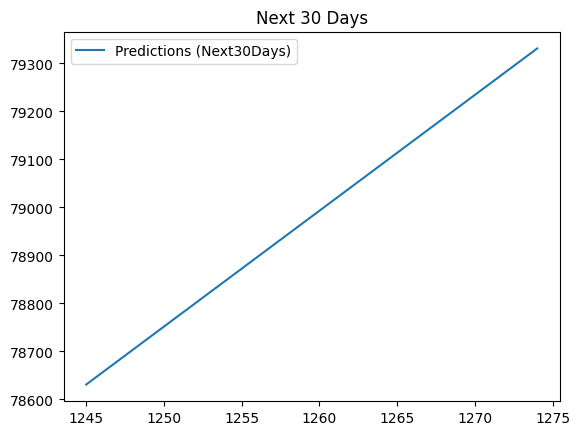

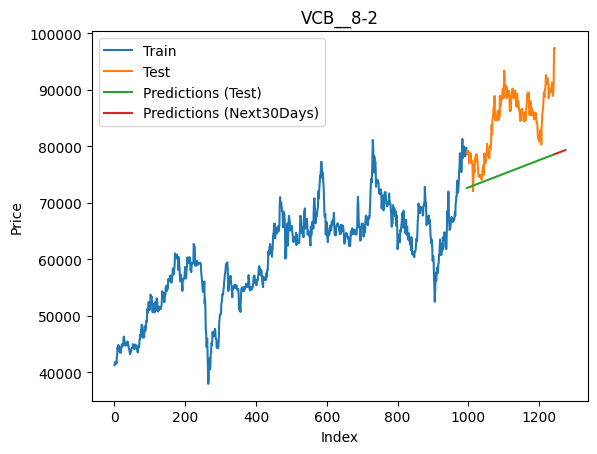

In [15]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))